### CIFAR10 Classification

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
y_train = y_train.reshape(-1,)  # convert it from 2D array to a 1D array 
y_test = y_test.reshape(-1,)

Text(0.5, 0, '9')

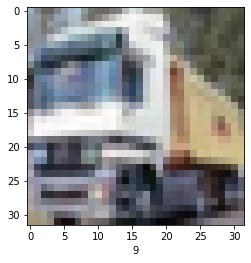

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

plt.imshow(x_train[1])
plt.xlabel(y_train[1])

In [7]:
classes_label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

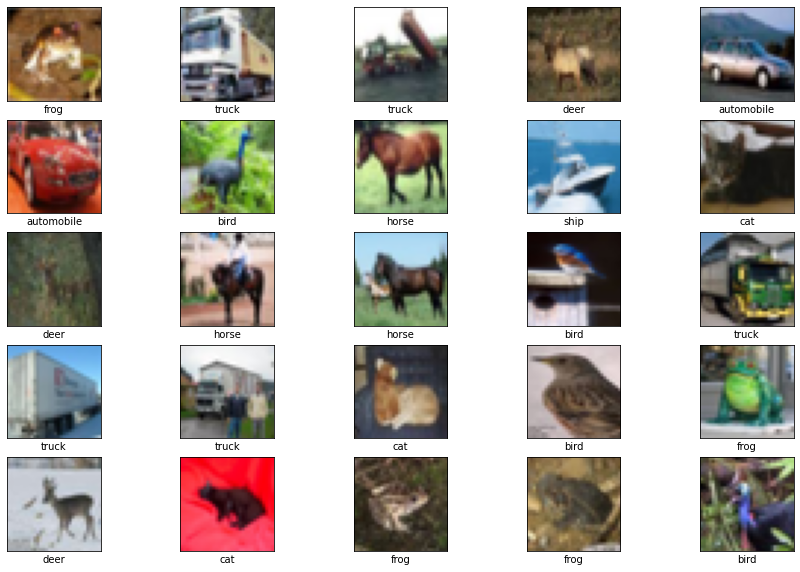

In [8]:
fig =plt.figure(figsize =(15,10)) # first 25 records
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes_label[y_train[i]])

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [10]:
x_train = x_train/255
x_test = x_test/255
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
model = Sequential()
model.add(Flatten(input_shape = (32,32,3)))
model.add(Dense(3000,activation = 'relu'))
model.add(Dense(1000,activation = 'relu'))
model.add(Dense(10,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 3000)              9219000   
                                                                 
 dense_3 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_4 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
"""
loss = SGD,sparse_categorical_crossentropy,categorical_crossentropy
optimizer = SGD,adam,rmsprop,
"""

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size = 100,epochs = 10,verbose = 1,validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 94s 236ms/step - loss: 1.7141 - accuracy: 0.3822 - val_loss: 1.6801 - val_accuracy: 0.3977
Epoch 2/10
400/400 [==============================] - 93s 232ms/step - loss: 1.6324 - accuracy: 0.4156 - val_loss: 1.6209 - val_accuracy: 0.4200
Epoch 3/10
400/400 [==============================] - 92s 231ms/step - loss: 1.5748 - accuracy: 0.4354 - val_loss: 1.5875 - val_accuracy: 0.4333
Epoch 4/10
400/400 [==============================] - 93s 232ms/step - loss: 1.5211 - accuracy: 0.4568 - val_loss: 1.5447 - val_accuracy: 0.4552
Epoch 5/10
400/400 [==============================] - 94s 236ms/step - loss: 1.4743 - accuracy: 0.4729 - val_loss: 1.5219 - val_accuracy: 0.4621
Epoch 6/10
400/400 [==============================] - 93s 233ms/step - loss: 1.4388 - accuracy: 0.4854 - val_loss: 1.5882 - val_accuracy: 0.4364
Epoch 7/10
400/400 [==============================] - 93s 233ms/step - loss: 1.4086 - accuracy: 0.4956 - val_loss: 1.5193 - val_ac

In [22]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4329 - accuracy: 0.4914


[1.4329348802566528, 0.49140000343322754]

In [23]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 8s 25ms/step


array([[0.1330113 , 0.36362377, 0.38885903, ..., 0.10467596, 0.6074853 ,
        0.17222346],
       [0.9390392 , 0.886126  , 0.52108026, ..., 0.16485456, 0.94654125,
        0.9386713 ],
       [0.93855137, 0.8400234 , 0.26128983, ..., 0.7142939 , 0.9756738 ,
        0.8474173 ],
       ...,
       [0.00393068, 0.00289531, 0.8388691 , ..., 0.36102712, 0.2802978 ,
        0.04848064],
       [0.4587055 , 0.0680043 , 0.7888154 , ..., 0.5768776 , 0.05412147,
        0.10238919],
       [0.4130875 , 0.02766282, 0.7379456 , ..., 0.9618997 , 0.05279507,
        0.14217153]], dtype=float32)

In [27]:
y_pred_out = [np.argmax(i) for i in y_pred]
y_pred_out[:5]

[3, 8, 8, 8, 4]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [31]:
cm = tf.math.confusion_matrix(y_test,y_pred_out)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[584,  15,  68,  29,  27,  17,  22,  91, 121,  26],
       [ 67, 534,  12,  33,   9,  21,  14,  77,  84, 149],
       [ 69,  13, 305, 104, 152,  80, 113, 136,  17,  11],
       [ 40,  10,  68, 375,  44, 171, 114, 119,  28,  31],
       [ 57,   7, 102,  71, 417,  41, 125, 153,  20,   7],
       [ 29,   9,  68, 228,  63, 343,  75, 144,  23,  18],
       [  9,   5,  52, 150, 116,  49, 536,  58,  12,  13],
       [ 38,   8,  29,  80,  68,  44,  24, 675,  11,  23],
       [145,  39,  18,  31,  26,  12,   6,  36, 638,  49],
       [ 69, 131,  11,  44,  12,  16,  16, 101,  93, 507]])>

In [32]:
import seaborn as sns

Text(69.0, 0.5, 'truth')

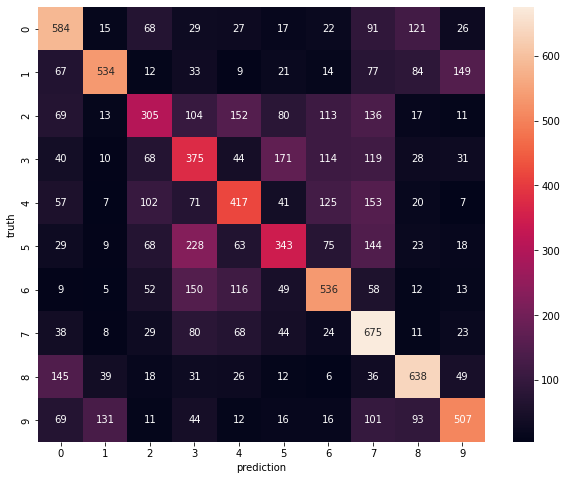

In [35]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(cm,annot=True,fmt= 'd')
plt.xlabel('prediction')
plt.ylabel('truth')